In [1]:

# Import necessary libraries
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,train_test_split ,StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, BaggingClassifier,BaggingRegressor,RandomForestClassifier
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

warnings.simplefilter('ignore')

os.chdir('D:\Datasets')

hr = pd.read_csv('Hr_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
dum_hr = pd.get_dummies(hr, drop_first=True)

# Separate features (X) and target variable (y)
x = dum_hr.drop(['left'], axis=1)
y = dum_hr['left']
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [4]:
# Split the dataset into training and testing sets with a test size of 30% and stratified sampling based on the target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create a Random Forest Classifier with a random state of 24
rf = RandomForestClassifier(random_state=24)

# Fit the Random Forest Classifier to the training data
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=24)

In [5]:
# Use the trained Random Forest Classifier to predict the classes of the test data
y_pred = rf.predict(x_test)

# Calculate and print the accuracy score of the predictions
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9873305178928651


In [6]:
# Get the predicted probabilities of the positive class (1) for the test data
y_pred_prob = rf.predict_proba(x_test)[:, 1]

# Calculate and print the log loss of the predicted probabilities
print("Log Loss:", log_loss(y_test, y_pred_prob))

Log Loss: 0.136534673012183


# gridsearch

In [9]:
# Create a Stratified K-Fold cross-validation object with 5 splits, shuffling the data, and a random state of 24
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

# Create a Random Forest Classifier with a random state of 24
rf = RandomForestClassifier(random_state=24)

# Define the parameter grid for hyperparameter tuning
params = {
    'max_features': [3, 4, 5, 6, 7],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Create a GridSearchCV object to perform cross-validation and hyperparameter tuning
# Use the Random Forest Classifier as the estimator, the parameter grid defined above, the Stratified K-Fold cross-validation,
# set the verbosity to 3, and use the negative log loss as the scoring metric
gcv = GridSearchCV(rf, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')

# Fit the GridSearchCV object to the entire dataset (x and y)
gcv.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Create a DataFrame with the cross-validation results
pd_Cv = pd.DataFrame(gcv.cv_results_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.085 total time=   0.6s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.086 total time=   0.6s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.117 total time=   0.7s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.072 total time=   0.7s
[CV 5/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.073 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=-0.081 total time=   0.6s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=-0.075 total time=   0.6s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=-0.114 tota

# random forrest tree

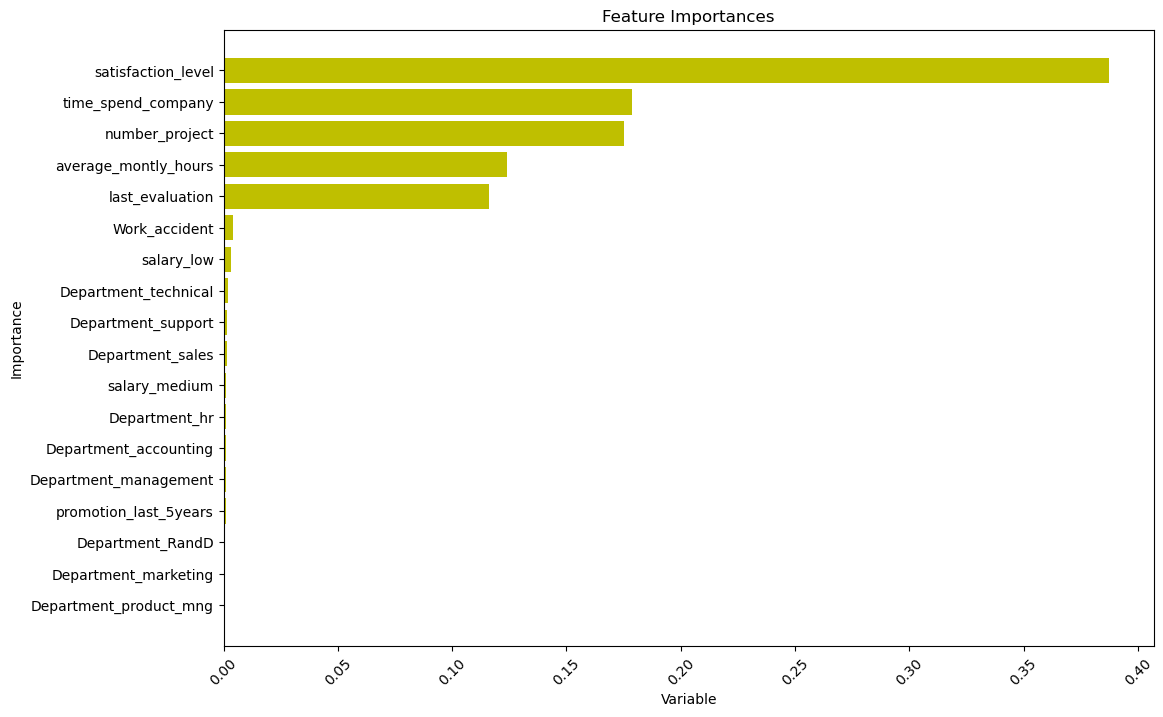

In [10]:
# Get the best estimator (Random Forest Regressor) from the GridSearchCV
best_model = gcv.best_estimator_

# Create a DataFrame with the feature names and their corresponding importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_model.feature_importances_})

# Sort the DataFrame by the importance values in descending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Add labels and title
plt.xlabel('Variable')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Importance')
plt.title('Feature Importances')

# Display the plot
plt.show()

# decision tree

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, min_samples_split=1;, score=nan total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, min_samples_split=5;, score=-0.416 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, min_samples_split=5;, score=-0.418 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_split=5;, score=-0.415 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, min_samples_split=5;, score=-0.422 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, min_samples_split

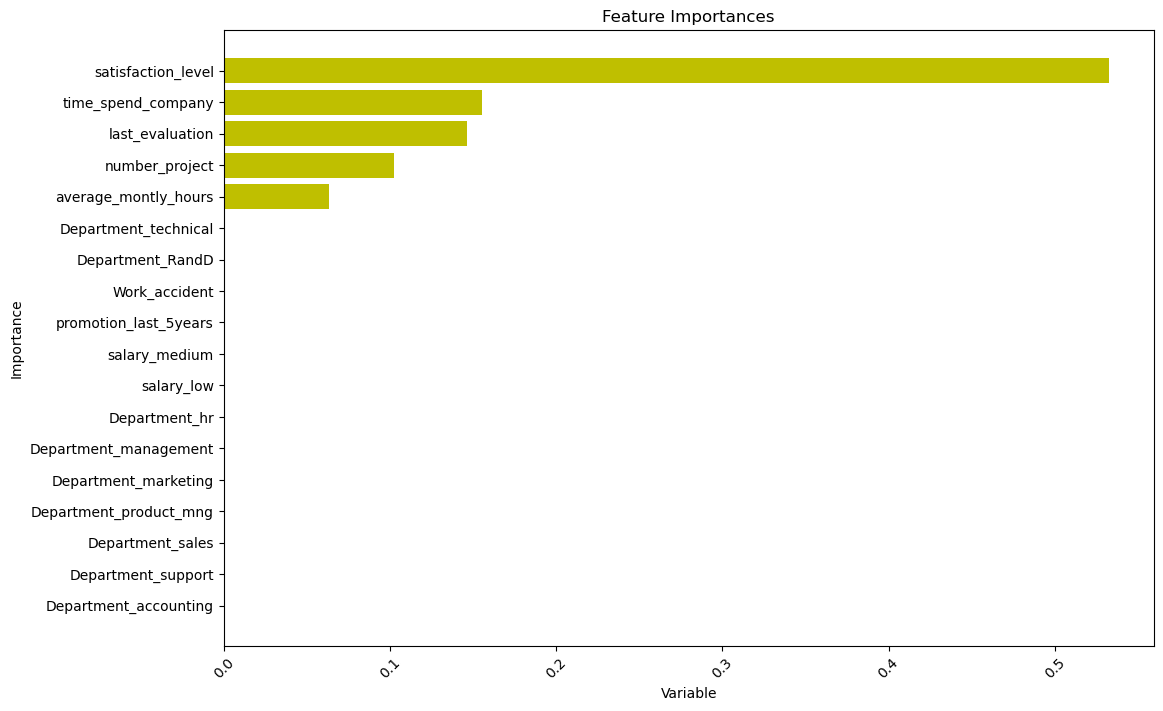

In [11]:
# Create a Decision Tree Classifier with a random state of 24
dtc = DecisionTreeClassifier(random_state=24)

# Define the parameter grid for hyperparameter tuning
params = {
    'max_features': [None, 3, 5],
    'max_depth': [1, 3, 5],
    'min_samples_split': [1, 5, 10]
}

# Create a GridSearchCV object to perform cross-validation and hyperparameter tuning
# Use the Decision Tree Classifier as the estimator, the parameter grid defined above, the Stratified K-Fold cross-validation,
# set the verbosity to 3, and use the negative log loss as the scoring metric
gcv_s = GridSearchCV(dtc, param_grid=params, verbose=3, cv=kfold, scoring='neg_log_loss')

# Fit the GridSearchCV object to the entire dataset (x and y)
gcv_s.fit(x, y)

# Print the best parameters found by the GridSearchCV
print("Best Parameters:", gcv.best_params_)

# Print the best score (i.e., the lowest negative log loss) found during the grid search
print("Best Score:", gcv.best_score_)

# Get the best estimator (Decision Tree Classifier) from the GridSearchCV
best_tree = gcv_s.best_estimator_

# Create a DataFrame with the feature names and their corresponding importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Sort the DataFrame by the importance values in descending order
pd_imp.sort_values(by='imp', inplace=True)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(12, 8))  # Set the figure size
plt.barh(pd_imp['var'], pd_imp['imp'], color='y')

# Add labels and title
plt.xlabel('Variable')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Importance')
plt.title('Feature Importances')

# Display the plot
plt.show()